**Problem Statamemt**

The Wine Manufacturing company is expanding and there is a new Wine brand is manufactured.Here we need to find the quality of the wine by various Chemical parameters like Acidity,Citric Acid content,Sugar content..etc

In [ ]:
#Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Uploading the dataset
wine_q=pd.read_csv("/content/drive/MyDrive/Youtube Course/34.Wine Quality Prediction/winequality-red.csv")

In [ ]:
wine_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Finding the shappe of the data
wine_q.shape

(1599, 12)

In [ ]:
#Find the null values in the data
wine_q.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis & Visualisation

In [ ]:
#Finding the basic Statistics of the data
wine_q.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_q['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

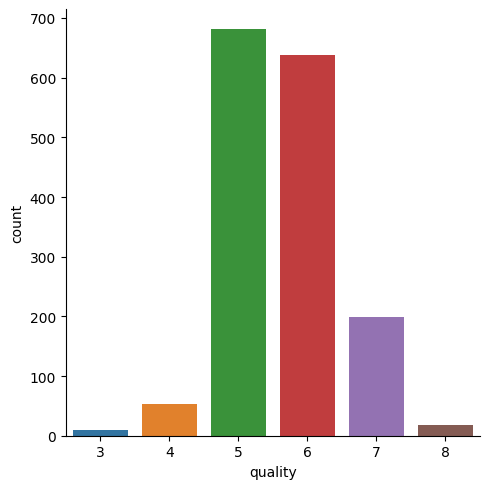

In [ ]:
#Number of values for each quality
sns.catplot(data=wine_q,x='quality',kind='count')

**Observarion**

It can see that the number of data points of wine quality is higher for quality 5 & 6.

<Axes: xlabel='quality', ylabel='volatile acidity'>

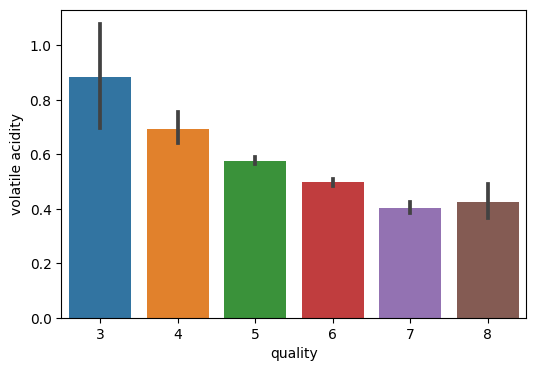

In [ ]:
#Comparing the columns and plot(volutile acidity and quality)

plot=plt.figure(figsize=(6,4))
sns.barplot(x='quality',y='volatile acidity',data=wine_q)

<Axes: xlabel='quality', ylabel='citric acid'>

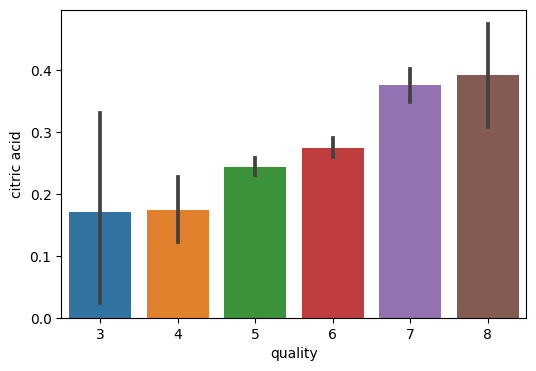

In [ ]:
#Comparing the columns and plot(citric acid and quality)
plot=plt.figure(figsize=(6,4))
sns.barplot(x='quality',y='citric acid',data=wine_q)

Correlation

1.Positive Coorelation


2.Negative Coorelation

In [ ]:
 # Now we can find the corelation of all the attribute available with quality of wine
coorelation= wine_q.corr()

<Axes: >

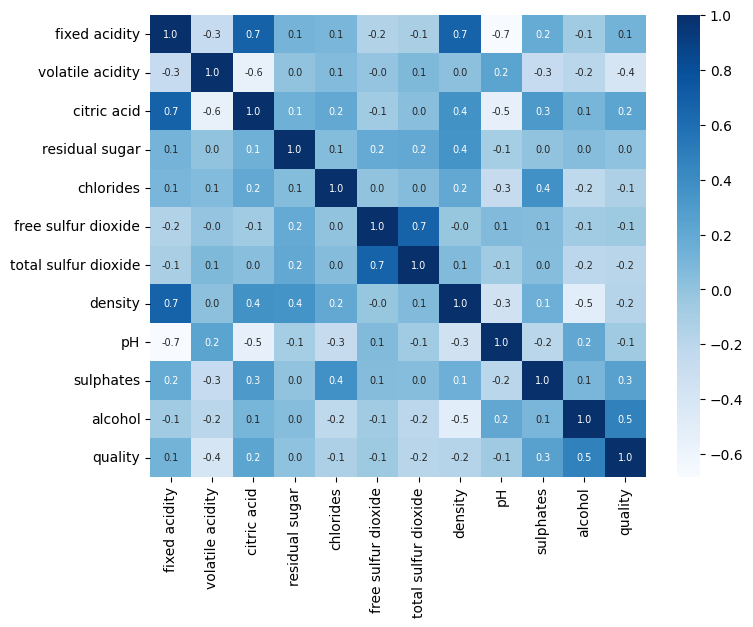

In [ ]:
#construct a heat map to understand the corelation between columns
plt.figure(figsize=(8,6))
sns.heatmap(coorelation,cbar=True,cmap='Blues',annot=True,annot_kws={'size':7},fmt='.1f')

Data Preprocessing

In [ ]:
#We are seperating the data and labels
x=wine_q.drop(['quality'],axis=1)
y=wine_q['quality']

Label Binarisation(Label Encoding)

We are saying, if the quality of wine is 7,8,9, the quality is good and if the quality of the wine is equal and less than 6, the quality is bad

In [ ]:
#We are replacing 7,8,9 equals to 1 and 6 and below 6 as 0.
wine_q

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_q['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
y=wine_q['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

Train Test Split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [ ]:
#Training the model-Random Forest Classifier
model=RandomForestClassifier()

In [ ]:
#Train the model
model.fit(x_train,y_train)

RandomForestClassifier()

Evaluation of Model


Accuracy Score

In [ ]:
#Accuracy score of the training model
x_train_prediction=model.predict(x_train)
x_train_accuracy=accuracy_score(x_train_prediction,y_train)

In [ ]:
print("Accuracy Score of the training data is",x_train_accuracy)

Accuracy Score of the training data is 1.0


In [ ]:
 #Accuracy score of the test model
x_test_prediction=model.predict(x_test)
x_test_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print("The accuracy score of the model is ",x_test_accuracy)

The accuracy score of the model is  0.921875


Build a predictive System

In [ ]:
input_data=(5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9)
#Process the above value.For that convert the input data to a numpy array
np_array_ip=np.asarray(input_data)
#Reshape the data to predict the label for 1 instance
input_data_reshaped=np_array_ip.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if prediction==1:
  print("The quality of the wine is good")
else:
  print("The quality of the qine is not good")

[0]
The quality of teh qine is not good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
